In [1]:
import pandas as pd
import mysql.connector as mysql

### 1. Koneksi Database

In [2]:
db = mysql.connect(host="localhost", database="dsc_project1", user="root")

### 2. CRUD Tabel Employee

In [3]:
# create
csr = db.cursor()
sql = "INSERT INTO employees VALUES(155, 'Huda', 'Miftahul', 'x666', 'iniakunhuda@gmail.com', 1, 1002, 'CTO')"
csr.execute(sql)
db.commit()

In [4]:
# read
csr = db.cursor()
csr.execute("SELECT * FROM employees")
csr.fetchall()

[(155, 'Huda', 'Miftahul', 'x666', 'iniakunhuda@gmail.com', '1', 1002, 'CTO'),
 (1002,
  'Murphy',
  'Diane',
  'x5800',
  'dmurphy@classicmodelcars.com',
  '1',
  None,
  'President'),
 (1056,
  'Patterson',
  'Mary',
  'x4611',
  'mpatterso@classicmodelcars.com',
  '1',
  1002,
  'VP Sales'),
 (1076,
  'Firrelli',
  'Jeff',
  'x9273',
  'jfirrelli@classicmodelcars.com',
  '1',
  1002,
  'VP Marketing'),
 (1088,
  'Patterson',
  'William',
  'x4871',
  'wpatterson@classicmodelcars.com',
  '6',
  1056,
  'Sales Manager (APAC)'),
 (1102,
  'Bondur',
  'Gerard',
  'x5408',
  'gbondur@classicmodelcars.com',
  '4',
  1056,
  'Sale Manager (EMEA)'),
 (1143,
  'Bow',
  'Anthony',
  'x5428',
  'abow@classicmodelcars.com',
  '1',
  1056,
  'Sales Manager (NA)'),
 (1165,
  'Jennings',
  'Leslie',
  'x3291',
  'ljennings@classicmodelcars.com',
  '1',
  1143,
  'Sales Rep'),
 (1166,
  'Thompson',
  'Leslie',
  'x4065',
  'lthompson@classicmodelcars.com',
  '1',
  1143,
  'sls rep'),
 (1188,
  'Fi

In [5]:
# update
csr = db.cursor()
sql = "UPDATE employees SET lastName='Huda UTM' WHERE employeeNumber=155"
csr.execute(sql)
db.commit()

In [6]:
# delete
csr = db.cursor()
sql = "DELETE FROM employees WHERE employeeNumber=155"
csr.execute(sql)
db.commit()

### 3. Join tabel dan tampilkan di Panda

Studi Kasus:
Saya ingin mengetahui sales yang melakukan penjualan paling banyak

In [7]:
csr.execute("SELECT c.customerNumber, c.customerName, p.paymentDate, p.amount, \
        e.employeeNumber, CONCAT(e.firstName, ' ', e.lastName) as nama, e.email, e.jobTitle \
        FROM customers c  \
        INNER JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber \
        INNER JOIN payments p ON p.customerNumber = c.customerNumber")
tbl_employee = csr.fetchall()
dt = pd.DataFrame(columns=["Kode Cust", "Nama Cust", "Tanggal Bayar", "Jumlah Bayar","Kode Pegawai",  "Nama Pegawai", "Email", "Pekerjaan"], data=tbl_employee)
dt.head(10)

,Kode Cust,Nama Cust,Tanggal Bayar,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan
0,124,Mini Gifts Distributors Ltd.,2005-03-05,101244.59,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
1,124,Mini Gifts Distributors Ltd.,2004-08-28,85410.87,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
2,124,Mini Gifts Distributors Ltd.,2003-04-11,11044.30,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
3,124,Mini Gifts Distributors Ltd.,2005-04-16,83598.04,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
4,124,Mini Gifts Distributors Ltd.,2004-12-27,47142.70,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
5,124,Mini Gifts Distributors Ltd.,2004-11-02,55639.66,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
6,124,Mini Gifts Distributors Ltd.,2003-08-15,111654.40,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
7,124,Mini Gifts Distributors Ltd.,2004-03-26,43369.30,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
8,124,Mini Gifts Distributors Ltd.,2003-11-25,45084.38,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
9,129,Mini Wheels Co.,2004-12-08,26248.78,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep


### 4. Data preprocessing

Membersihkan data yang memiliki nilai yang kosong/hilang

In [8]:
import numpy as np
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Kode Cust      273 non-null    int64 
 1   Nama Cust      273 non-null    object
 2   Tanggal Bayar  273 non-null    object
 3   Jumlah Bayar   273 non-null    object
 4   Kode Pegawai   273 non-null    int64 
 5   Nama Pegawai   273 non-null    object
 6   Email          273 non-null    object
 7   Pekerjaan      273 non-null    object
dtypes: int64(2), object(6)
memory usage: 17.2+ KB


In [9]:
dt.isnull().sum()

Kode Cust        0
Nama Cust        0
Tanggal Bayar    0
Jumlah Bayar     0
Kode Pegawai     0
Nama Pegawai     0
Email            0
Pekerjaan        0
dtype: int64

Mendeteksi outlier pada data

In [10]:
dt["Nama Cust"].value_counts()

Euro+ Shopping Channel                13
Mini Gifts Distributors Ltd.           9
Muscle Machine Inc                     4
Baane Mini Imports                     4
Down Under Souveniers, Inc             4
                                      ..
Daedalus Designs Imports               2
Bavarian Collectables Imports, Co.     1
The Sharp Gifts Warehouse              1
King Kong Collectables, Co.            1
Collectable Mini Designs Co.           1
Name: Nama Cust, Length: 98, dtype: int64

In [11]:
dt["Tanggal Bayar"].value_counts()

2003-11-24    3
2003-11-18    3
2003-12-09    3
2004-06-21    3
2003-10-31    2
             ..
2004-01-31    1
2004-02-06    1
2004-03-10    1
2004-09-11    1
2003-01-30    1
Name: Tanggal Bayar, Length: 232, dtype: int64

In [12]:
dt['Kode Pegawai'].value_counts()

1370    29
1401    27
1504    21
1501    21
1165    21
1323    20
1337    19
1286    17
1611    16
1216    15
1188    14
1621    14
1612    14
1166    13
1702    12
Name: Kode Pegawai, dtype: int64

In [13]:
dt['Nama Pegawai'].value_counts()

Gerard Hernandez    29
Pamela Castillo     27
Barry Jones         21
Leslie Jennings     21
Larry Bott          21
George Vanauf       20
Loui Bondur         19
Foon Yue Tseng      17
Andy Fixter         16
Steve Patterson     15
Mami Nishi          14
Julie Firrelli      14
Peter Marsh         14
Leslie Thompson     13
Martin Gerard       12
Name: Nama Pegawai, dtype: int64

In [14]:
dt['Pekerjaan'].value_counts() # ada 3 data beda, harusnya sama

Sales Rep    192
sls rep       48
sale rep      33
Name: Pekerjaan, dtype: int64

In [15]:
dt['Pekerjaan'] = dt['Pekerjaan'].replace(["sls rep","sale rep"],"Sales Rep")
dt['Pekerjaan'].value_counts()

Sales Rep    273
Name: Pekerjaan, dtype: int64

In [16]:
# convert Jumlah Bayar to float
dt["Jumlah Bayar"] = dt['Jumlah Bayar'].astype(float)

# convert Kode ke string
dt['Kode Cust'] = dt['Kode Cust'].astype('str')
dt['Kode Pegawai'] = dt['Kode Pegawai'].astype('str')

<AxesSubplot:>

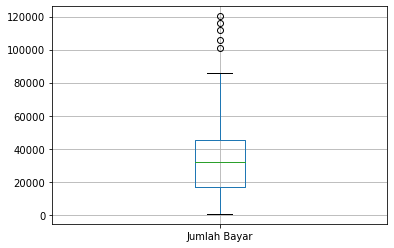

In [17]:
dt.boxplot(["Jumlah Bayar"])

In [18]:
dt.describe()

,Jumlah Bayar
count,273.000000
mean,32431.645531
std,20997.116917
min,615.450000
25%,16909.840000
50%,32077.440000
75%,45352.470000
max,120166.580000


In [19]:
dt._get_numeric_data()

,Jumlah Bayar
0,101244.59
1,85410.87
2,11044.30
3,83598.04
4,47142.70
...,...
268,33145.56
269,22162.61
270,57131.92
271,3474.66


In [20]:
from scipy import stats

hasil_zscore = np.abs(stats.zscore(dt._get_numeric_data()))
print(hasil_zscore)

[[3.28327566]
 [2.52780054]
 [1.02045555]
 [2.44130488]
 [0.70190932]
 [1.10732522]
 [3.77995947]
 [0.52186889]
 [0.60370059]
 [0.29500339]
 [0.40592908]
 [0.75834151]
 [1.43126732]
 [0.87372164]
 [0.94182968]
 [0.2978957 ]
 [2.534874  ]
 [0.684683  ]
 [1.29396532]
 [0.11616008]
 [0.94750324]
 [0.87031116]
 [0.0100357 ]
 [0.04371634]
 [1.36228808]
 [0.854593  ]
 [0.34109844]
 [1.38267157]
 [1.33433348]
 [2.28753526]
 [0.54287699]
 [0.5715616 ]
 [1.18106007]
 [0.17361942]
 [0.98232566]
 [0.57620218]
 [0.8932463 ]
 [1.33631119]
 [1.15104713]
 [0.40962154]
 [0.95983606]
 [0.43412129]
 [0.10375845]
 [0.19604413]
 [0.01186454]
 [0.94954393]
 [1.28030794]
 [1.24793707]
 [0.12980214]
 [1.47554927]
 [1.08656484]
 [1.25937103]
 [1.26788303]
 [0.71472648]
 [0.51064391]
 [0.66597572]
 [0.82886569]
 [0.87639548]
 [1.05960268]
 [1.09711988]
 [0.10200457]
 [1.07133913]
 [0.75979336]
 [1.25780599]
 [0.57814887]
 [1.26008762]
 [0.35942169]
 [0.46898522]
 [1.28524009]
 [0.57107059]
 [0.16037624]
 [0.45

In [21]:
hasil_zscore.shape

(273, 1)

In [22]:
outlier = dt[(hasil_zscore > 3).all(axis=1)]
print(outlier.shape)

(5, 8)


In [23]:
outlier
# data ini tidak logic karena beda jauh dengan varian data yang lain, sesuai dg boxplot, ada 5 data

,Kode Cust,Nama Cust,Tanggal Bayar,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan
0,124,Mini Gifts Distributors Ltd.,2005-03-05,101244.59,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
6,124,Mini Gifts Distributors Ltd.,2003-08-15,111654.40,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
129,141,Euro+ Shopping Channel,2004-12-31,116208.40,1370,Gerard Hernandez,ghernande@classicmodelcars.com,Sales Rep
131,141,Euro+ Shopping Channel,2005-03-18,120166.58,1370,Gerard Hernandez,ghernande@classicmodelcars.com,Sales Rep
249,148,"Dragon Souveniers, Ltd.",2003-12-26,105743.00,1621,Mami Nishi,mnishi@classicmodelcars.com,Sales Rep


In [24]:
import seaborn as sns
sns.set(style="whitegrid")

In [25]:
dt_2 = pd.DataFrame([])

dt_2["Keterangan"] = ["Tidak ada outlier","Outlier"]
dt_2["Jumlah Observasi"] = [273, 5]

dt_2

,Keterangan,Jumlah Observasi
0,Tidak ada outlier,273
1,Outlier,5


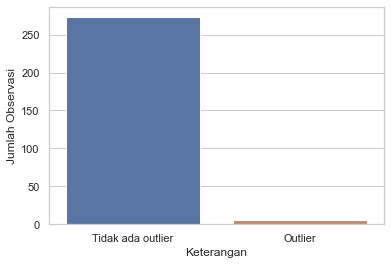

In [26]:
plot=sns.barplot(x="Keterangan",y="Jumlah Observasi",data=dt_2)

Melakukan normalisasi nilai pada data

In [27]:
from sklearn import preprocessing

In [28]:
# min-max normalization
dt["Jumlah Bayar"] = (dt["Jumlah Bayar"] - dt["Jumlah Bayar"].min()) / (dt["Jumlah Bayar"].max() - dt["Jumlah Bayar"].min())
dt.head(10)

,Kode Cust,Nama Cust,Tanggal Bayar,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan
0,124,Mini Gifts Distributors Ltd.,2005-03-05,0.841725,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
1,124,Mini Gifts Distributors Ltd.,2004-08-28,0.709282,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
2,124,Mini Gifts Distributors Ltd.,2003-04-11,0.087233,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
3,124,Mini Gifts Distributors Ltd.,2005-04-16,0.694118,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
4,124,Mini Gifts Distributors Ltd.,2004-12-27,0.389183,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
5,124,Mini Gifts Distributors Ltd.,2004-11-02,0.460257,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
6,124,Mini Gifts Distributors Ltd.,2003-08-15,0.928799,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
7,124,Mini Gifts Distributors Ltd.,2004-03-26,0.357620,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
8,124,Mini Gifts Distributors Ltd.,2003-11-25,0.371966,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
9,129,Mini Wheels Co.,2004-12-08,0.214413,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep


Melakukan transformasi data (label encoding, scalling, binning)

In [29]:
# split tanggal ke kolom tahun, bulan, hari
import dateutil
dt['Tanggal Bayar'] = dt['Tanggal Bayar'].astype('str')
dt["Tanggal Bayar"] = dt["Tanggal Bayar"].apply(lambda x: dateutil.parser.parse(x))
sp = dt['Tanggal Bayar']
dt['Tahun'] = sp.dt.year
dt['Bulan'] = sp.dt.month
dt['Hari'] = sp.dt.day
dt = dt.drop(columns=['Tanggal Bayar'])
dt.head(10)

,Kode Cust,Nama Cust,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan,Tahun,Bulan,Hari
0,124,Mini Gifts Distributors Ltd.,0.841725,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2005,3,5
1,124,Mini Gifts Distributors Ltd.,0.709282,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,8,28
2,124,Mini Gifts Distributors Ltd.,0.087233,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2003,4,11
3,124,Mini Gifts Distributors Ltd.,0.694118,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2005,4,16
4,124,Mini Gifts Distributors Ltd.,0.389183,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,12,27
5,124,Mini Gifts Distributors Ltd.,0.460257,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,11,2
6,124,Mini Gifts Distributors Ltd.,0.928799,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2003,8,15
7,124,Mini Gifts Distributors Ltd.,0.357620,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,3,26
8,124,Mini Gifts Distributors Ltd.,0.371966,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2003,11,25
9,129,Mini Wheels Co.,0.214413,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,12,8


In [30]:
# remove kolom email & pekerjaan -> karena sudah tahu itu sales semua
dt = dt.drop(columns=['Email', 'Pekerjaan'])
dt.head(5)

,Kode Cust,Nama Cust,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Tahun,Bulan,Hari
0,124,Mini Gifts Distributors Ltd.,0.841725,1165,Leslie Jennings,2005,3,5
1,124,Mini Gifts Distributors Ltd.,0.709282,1165,Leslie Jennings,2004,8,28
2,124,Mini Gifts Distributors Ltd.,0.087233,1165,Leslie Jennings,2003,4,11
3,124,Mini Gifts Distributors Ltd.,0.694118,1165,Leslie Jennings,2005,4,16
4,124,Mini Gifts Distributors Ltd.,0.389183,1165,Leslie Jennings,2004,12,27


In [31]:
# gabungkan namacust & kode, begitu pula dg pegawai
dt['Cust'] = dt['Kode Cust'] + '_' + dt['Nama Cust']
dt['Pegawai'] = dt['Kode Pegawai'] + '_' + dt['Nama Pegawai']
dt.head(5)

,Kode Cust,Nama Cust,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Tahun,Bulan,Hari,Cust,Pegawai
0,124,Mini Gifts Distributors Ltd.,0.841725,1165,Leslie Jennings,2005,3,5,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
1,124,Mini Gifts Distributors Ltd.,0.709282,1165,Leslie Jennings,2004,8,28,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
2,124,Mini Gifts Distributors Ltd.,0.087233,1165,Leslie Jennings,2003,4,11,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
3,124,Mini Gifts Distributors Ltd.,0.694118,1165,Leslie Jennings,2005,4,16,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
4,124,Mini Gifts Distributors Ltd.,0.389183,1165,Leslie Jennings,2004,12,27,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings


In [32]:
# remove kolom kodeCust,NamaCust,KodePegawai,NamaPegawai -> karena sudah digabung
dt = dt.drop(columns=['Kode Cust', 'Nama Cust', "Kode Pegawai", "Nama Pegawai"])
dt.head(5)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai
0,0.841725,2005,3,5,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
1,0.709282,2004,8,28,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
2,0.087233,2003,4,11,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
3,0.694118,2005,4,16,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
4,0.389183,2004,12,27,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings


In [33]:
# label encoding & scaling
kategori = ["Cust",
            "Pegawai"]

le = preprocessing.LabelEncoder()
for feature in kategori:
    if feature in dt.columns.values:
        dt[feature] = le.fit_transform(dt[feature])

In [34]:
dt.head(5)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai
0,0.841725,2005,3,5,5,0
1,0.709282,2004,8,28,5,0
2,0.087233,2003,4,11,5,0
3,0.694118,2005,4,16,5,0
4,0.389183,2004,12,27,5,0


In [35]:
dt.dtypes

Jumlah Bayar    float64
Tahun             int64
Bulan             int64
Hari              int64
Cust              int32
Pegawai           int32
dtype: object

In [36]:
# bins -> membagi kategori nominal transaksi pembeli -> (Kecil, Normal, Agak Besar, Besar)
dt['Jumlah Bayar'].value_counts(bins=4, sort=False)

(-0.002, 0.25]    131
(0.25, 0.5]       125
(0.5, 0.75]        12
(0.75, 1.0]         5
Name: Jumlah Bayar, dtype: int64

In [37]:
cut_labels = ['Kecil', 'Normal', 'Agak Besar', 'Besar']
cut_bins = [-0, 0.25, 0.5, 0.75, 1.0]
dt['Kategori Transaksi'] = pd.cut(dt['Jumlah Bayar'], bins=cut_bins, labels=cut_labels)
dt.head(10)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai,Kategori Transaksi
0,0.841725,2005,3,5,5,0,Besar
1,0.709282,2004,8,28,5,0,Agak Besar
2,0.087233,2003,4,11,5,0,Kecil
3,0.694118,2005,4,16,5,0,Agak Besar
4,0.389183,2004,12,27,5,0,Normal
5,0.460257,2004,11,2,5,0,Normal
6,0.928799,2003,8,15,5,0,Besar
7,0.357620,2004,3,26,5,0,Normal
8,0.371966,2003,11,25,5,0,Normal
9,0.214413,2004,12,8,7,0,Kecil


Feature selection

In [38]:
# Menurut saya disini tidak perlu pakai feature selection, karena semua data dibutuhkan untuk visualisasi

Visualisasi Data

<AxesSubplot:xlabel='Tahun', ylabel='Jumlah Bayar'>

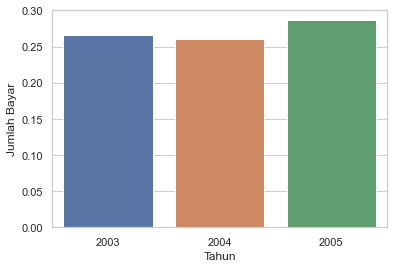

In [39]:
# tahun berapa penjualan terbanyak?
sns.set(style="whitegrid")
sns.barplot(x="Tahun",y="Jumlah Bayar",data=dt, ci=None)

<AxesSubplot:xlabel='Pegawai', ylabel='Jumlah Bayar'>

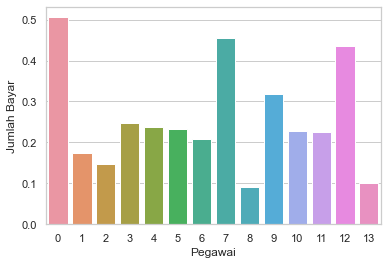

In [40]:
# siapa sales yg berhasil menjual paling banyak di tahun itu?
ds = dt[dt['Tahun'] == 2005]
sns.set(style="whitegrid")
sns.barplot(x="Pegawai",y="Jumlah Bayar",data=ds, ci=None)

<AxesSubplot:xlabel='Pegawai', ylabel='Jumlah Bayar'>

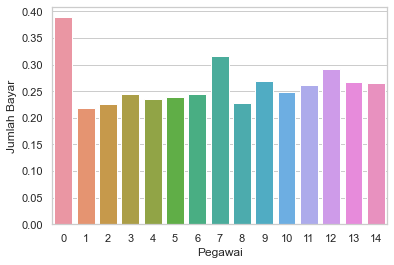

In [41]:
# siapa sales yg berhasil menjual paling banyak di semua tahun?
sns.set(style="whitegrid")
sns.barplot(x="Pegawai",y="Jumlah Bayar",data=dt, ci=None)

In [65]:
# list pegawai
mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'1165_Leslie Jennings': 0, '1166_Leslie Thompson': 1, '1188_Julie Firrelli': 2, '1216_Steve Patterson': 3, '1286_Foon Yue Tseng': 4, '1323_George Vanauf': 5, '1337_Loui Bondur': 6, '1370_Gerard Hernandez': 7, '1401_Pamela Castillo': 8, '1501_Larry Bott': 9, '1504_Barry Jones': 10, '1611_Andy Fixter': 11, '1612_Peter Marsh': 12, '1621_Mami Nishi': 13, '1702_Martin Gerard': 14}


<AxesSubplot:xlabel='Kategori Transaksi', ylabel='Jumlah Bayar'>

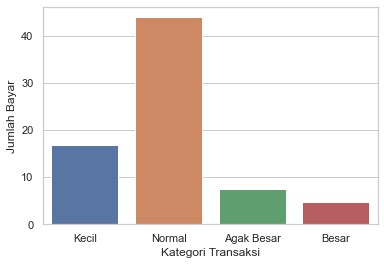

In [50]:
# jumlah kategori transaksi?
gt = dt.groupby(['Kategori Transaksi'])['Jumlah Bayar'].sum().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="Kategori Transaksi",y="Jumlah Bayar",data=gt, ci=None)

### 5. Membuat tabel pada database

In [129]:
# Jumlah Bayar	Tahun	Bulan	Hari	Cust	Pegawai	Kategori Transaksi
csr.execute("CREATE TABLE IF NOT EXISTS hasil_processing "+
              "(jml_bayar FLOAT NULL, "+
              "tahun INT(10) NULL, " +
              "bulan INT(10) NULL, " +
              "hari INT(10) NULL, " +
              "cust INT(10) NULL, " +
              "pegawai INT(10) NULL, " +
              "kategori VARCHAR(30) NULL)")

for baris in dt.values:
    sql_query = "INSERT INTO hasil_processing VALUES (%s, %s, %s, %s, %s, %s, %s)"
    csr.execute(sql_query, tuple(baris))
    print(baris, "Telah dimasukkan")
    db.commit()

[0.8417247080809692 2005 3 5 5 0 'Besar'] Telah dimasukkan
[0.7092816270327181 2004 8 28 5 0 'Agak Besar'] Telah dimasukkan
[0.08723338708718184 2003 4 11 5 0 'Kecil'] Telah dimasukkan
[0.6941179895162848 2005 4 16 5 0 'Agak Besar'] Telah dimasukkan
[0.38918285423149074 2004 12 27 5 0 'Normal'] Telah dimasukkan
[0.46025671191899237 2004 11 2 5 0 'Normal'] Telah dimasukkan
[0.9287988327672018 2003 8 15 5 0 'Besar'] Telah dimasukkan
[0.35761978995932536 2004 3 26 5 0 'Normal'] Telah dimasukkan
[0.37196578568517086 2003 11 25 5 0 'Normal'] Telah dimasukkan
[0.21441311345195982 2004 12 8 7 0 'Kecil'] Telah dimasukkan
[0.19496662223100691 2003 12 11 7 0 'Kecil'] Telah dimasukkan
[0.13318485571821861 2003 4 9 7 0 'Kecil'] Telah dimasukkan
[0.015213574309167968 2004 11 14 16 0 'Kecil'] Telah dimasukkan
[0.41930343945724313 2003 11 18 16 0 'Normal'] Telah dimasukkan
[0.10101736386766064 2005 2 2 16 0 'Kecil'] Telah dimasukkan
[0.31835483278158894 2003 8 5 16 0 'Normal'] Telah dimasukkan
[0.710

[0.2945256979168662 2003 5 12 73 8 'Normal'] Telah dimasukkan
[0.048551527701996625 2004 8 1 73 8 'Kecil'] Telah dimasukkan
[0.3529734934333118 2004 11 27 73 8 'Normal'] Telah dimasukkan
[0.3170931132144046 2003 11 18 75 8 'Normal'] Telah dimasukkan
[0.4266255785286178 2004 7 18 75 8 'Normal'] Telah dimasukkan
[0.22171643212406272 2003 11 15 84 8 'Kecil'] Telah dimasukkan
[0.12141683646152067 2003 11 20 84 8 'Kecil'] Telah dimasukkan
[0.06852022226807894 2005 5 3 84 8 'Kecil'] Telah dimasukkan
[0.05852399722194178 2004 2 17 90 8 'Kecil'] Telah dimasukkan
[0.14329274846670204 2003 10 27 90 8 'Kecil'] Telah dimasukkan
[0.19228132766290038 2005 3 10 25 9 'Kecil'] Telah dimasukkan
[0.30938252110205905 2003 10 27 25 9 'Normal'] Telah dimasukkan
[0.28210214324197525 2004 10 21 25 9 'Normal'] Telah dimasukkan
[0.4367155709862383 2004 11 3 26 9 'Normal'] Telah dimasukkan
[0.3893201176768467 2004 12 8 26 9 'Normal'] Telah dimasukkan
[0.39991458048117157 2003 3 27 26 9 'Normal'] Telah dimasukkan

ProgrammingError: 1054 (42S22): Unknown column 'nan' in 'field list'

### 6. Export to File

In [130]:
from pandas import DataFrame, read_csv
dt.to_csv("data_hasil_ekspor.csv", index=False)

In [132]:
data_ekspor = read_csv("data_hasil_ekspor.csv")
data_ekspor.head(10)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai,Kategori Transaksi
0,0.841725,2005,3,5,5,0,Besar
1,0.709282,2004,8,28,5,0,Agak Besar
2,0.087233,2003,4,11,5,0,Kecil
3,0.694118,2005,4,16,5,0,Agak Besar
4,0.389183,2004,12,27,5,0,Normal
5,0.460257,2004,11,2,5,0,Normal
6,0.928799,2003,8,15,5,0,Besar
7,0.357620,2004,3,26,5,0,Normal
8,0.371966,2003,11,25,5,0,Normal
9,0.214413,2004,12,8,7,0,Kecil
